In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import des données

In [3]:
num = pd.read_csv("../data/var_num.csv", index_col=[0])

In [4]:
cat = pd.read_csv("../data/data_categorielles.csv", index_col=[0])

In [5]:
df = pd.concat([cat, num], axis = 1)

In [16]:
df.columns

Index(['TARGET', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE_discret', 'NAME_EDUCATION_TYPE_discret',
       'NAME_FAMILY_STATUS_discret', 'DAYS_BIRTH_disc_int',
       'EXT_SOURCE_2_disc_int', 'AMT_GOODS_PRICE_disc_int',
       'DAYS_REGISTRATION_disc_int', 'DAYS_LAST_PHONE_CHANGE_disc_int',
       'EXT_SOURCE_3_disc_int', 'AMT_CREDIT_disc_int', 'AMT_ANNUITY_disc_int',
       'REGION_POPULATION_RELATIVE_disc_int', 'DAYS_EMPLOYED_disc_int',
       'DAYS_ID_PUBLISH_disc_int', 'AMT_REQ_CREDIT_BUREAU_YEAR_disc_int',
       'AMT_REQ_CREDIT_BUREAU_MON_disc_int', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'date'],
      dtype='object')

In [6]:
data = pd.read_csv("../data/application_train_vf.csv")
df["date"] = data["date_mensuelle"]
df["date"] = pd.to_datetime(df["date"])

In [9]:
data.shape

(306107, 124)

In [10]:
datat = pd.read_csv("../data/application_test_vf.csv")

In [11]:
datat.shape

(48732, 123)

In [17]:
df

,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,NAME_INCOME_TYPE_discret,NAME_EDUCATION_TYPE_discret,NAME_FAMILY_STATUS_discret,...,AMT_REQ_CREDIT_BUREAU_MON_disc_int,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,FLAG_WORK_PHONE,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,date
0,0,333721,Cash loans,M,Y,Y,House / apartment,high_income,lower,couple,...,[0.0-24.0],1,0,0,3,3,0,1,0,2013-01-01
1,0,250254,Cash loans,F,N,Y,With parents,high_income,higher,couple,...,[0.0-24.0],1,0,0,3,3,0,1,0,2013-01-01
2,0,265071,Cash loans,F,Y,N,House / apartment,high_income,lower,couple,...,[0.0-24.0],1,0,0,2,2,1,0,0,2013-01-01
3,0,227569,Cash loans,F,Y,Y,House / apartment,high_income,lower,alone,...,[0.0-24.0],1,0,0,1,1,0,0,0,2013-01-01
4,0,212616,Cash loans,F,N,N,House / apartment,high_income,lower,alone,...,[0.0-24.0],1,1,1,2,2,0,1,1,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306102,0,150198,Cash loans,F,N,N,House / apartment,low_income,lower,couple,...,[0.0-24.0],0,0,0,3,3,0,0,0,2020-12-01
306103,0,377351,Cash loans,F,N,Y,House / apartment,high_income,lower,alone,...,[0.0-24.0],1,0,1,2,2,0,0,1,2020-12-01
306104,0,365430,Cash loans,F,N,Y,House / apartment,high_income,lower,couple,...,[27.0-27.0],1,0,0,1,1,0,1,0,2020-12-01
306105,0,342888,Cash loans,M,N,Y,House / apartment,low_income,lower,alone,...,[0.0-24.0],0,1,0,3,3,0,0,0,2020-12-01


# Vérification des déséquilibres interclasses

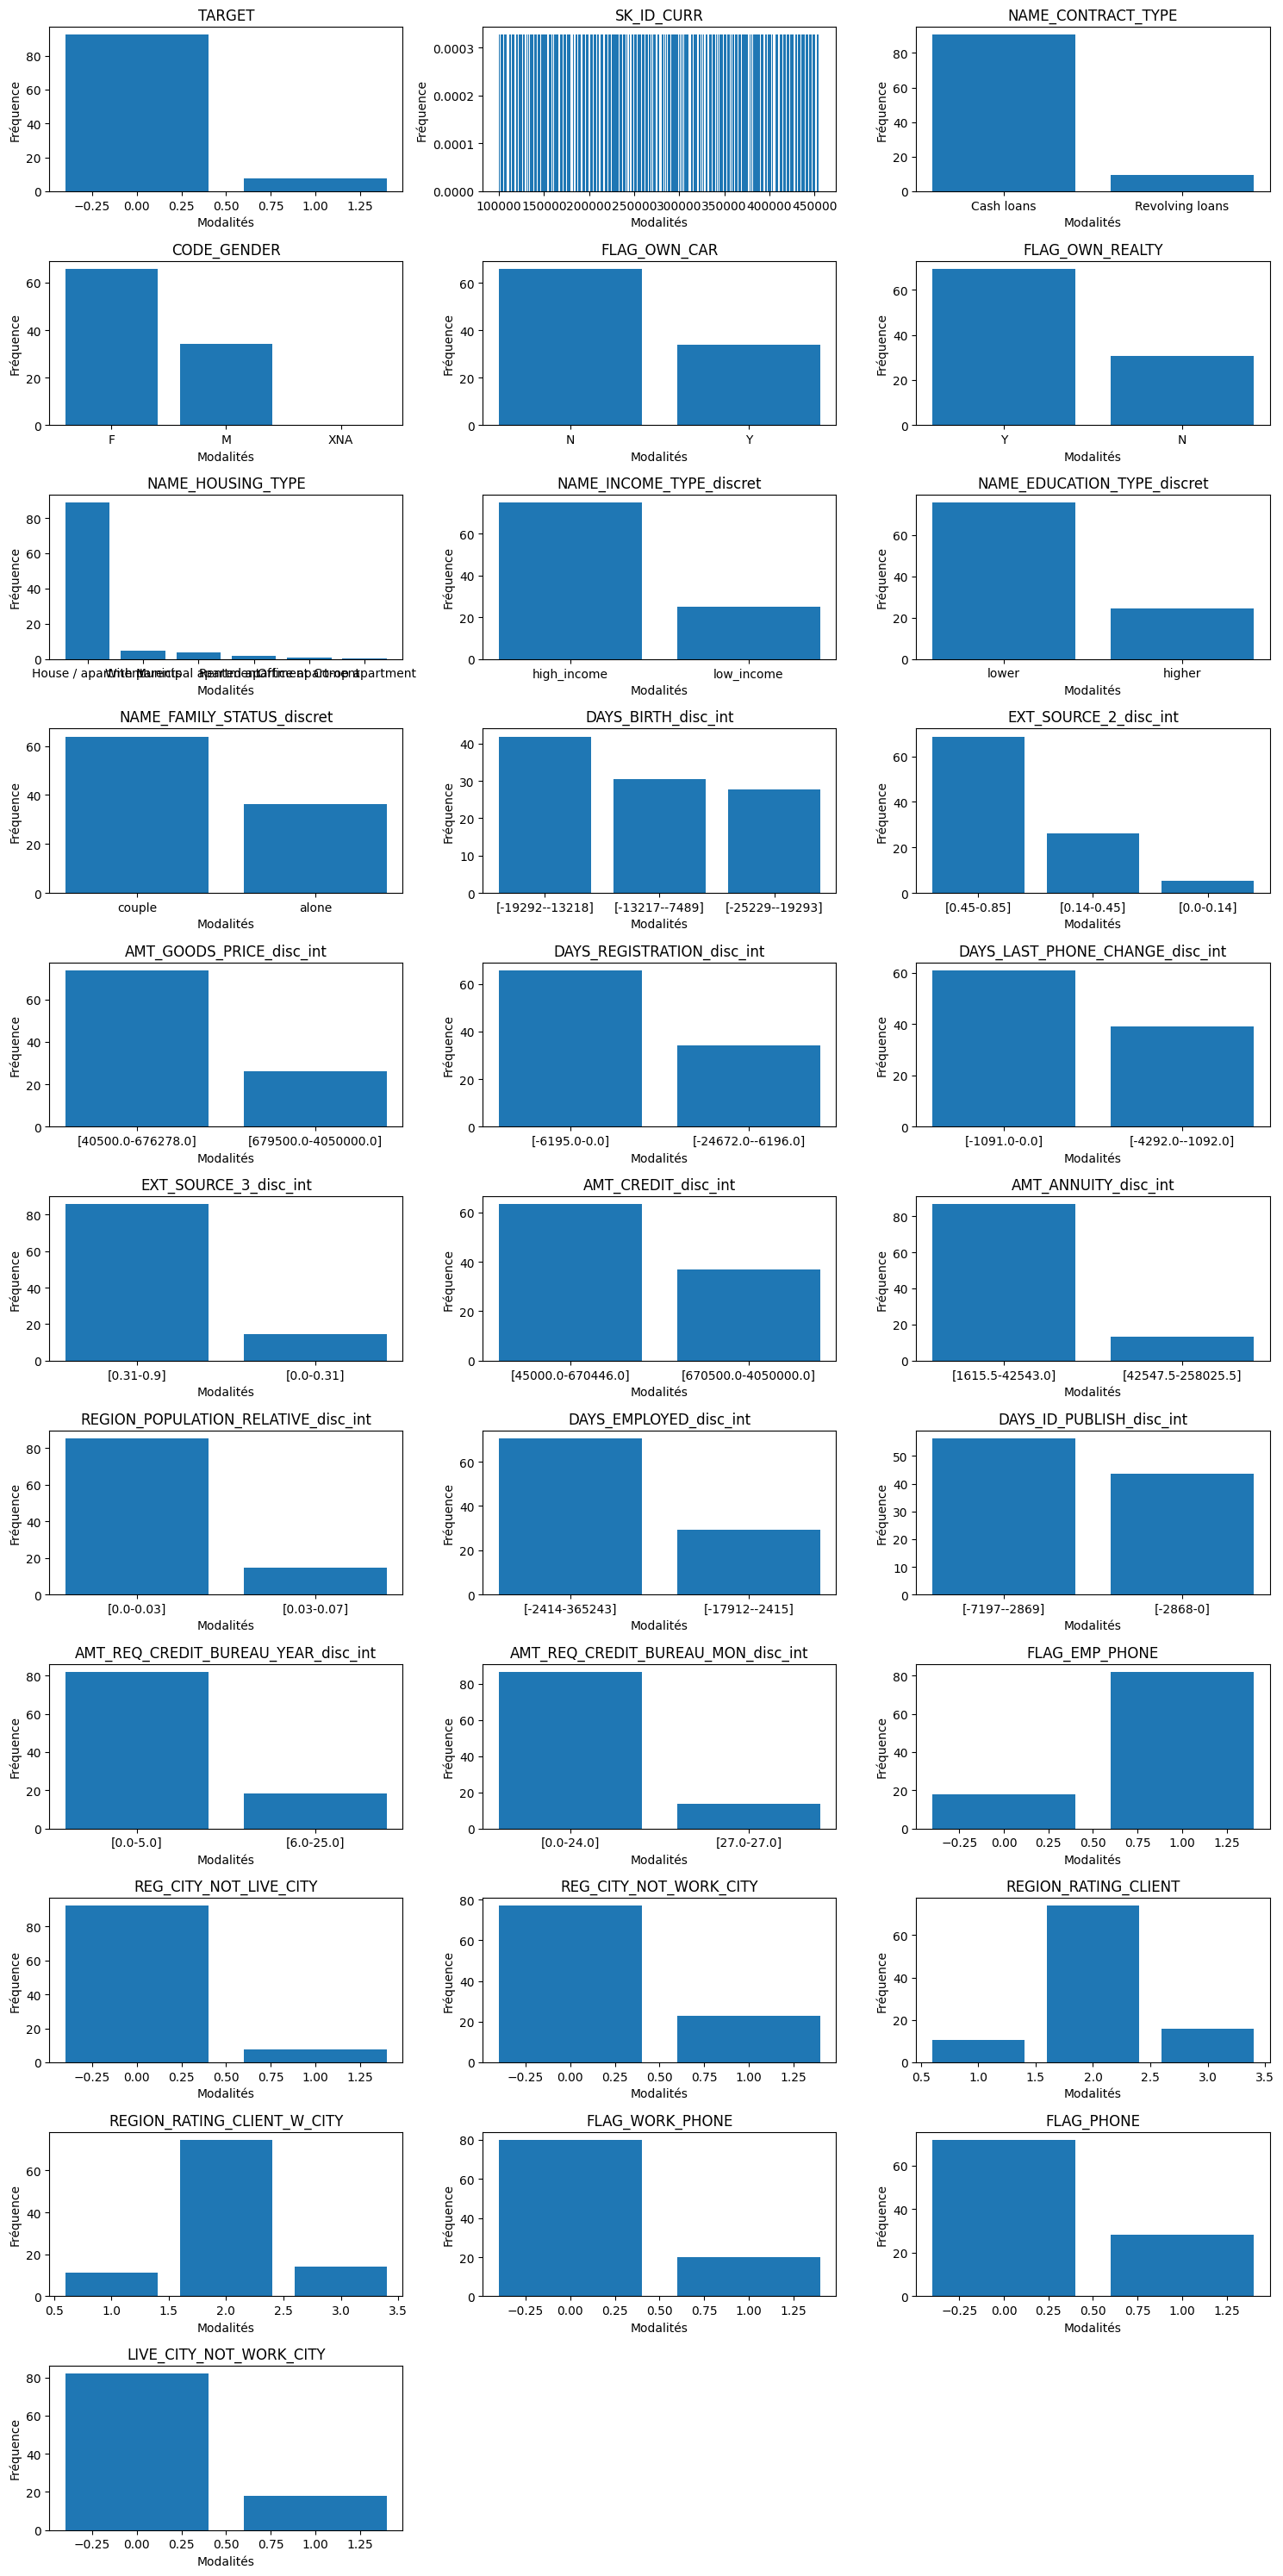

In [19]:
n_vars = len(df.columns)

fig, axs = plt.subplots(nrows=(n_vars // 3) + (n_vars % 3 > 0), ncols=3, figsize=(15, 30))
axs = axs.flatten()

for i, var in enumerate(df.columns):
    counts = (df[var].value_counts() / df.shape[0])*100
    axs[i].bar(counts.index, counts.values)
    axs[i].set_title(var)
    axs[i].set_xlabel('Modalités')
    axs[i].set_ylabel('Fréquence')

for ax in axs[n_vars:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [27]:
for var in df.columns : 
    if np.min((df[var].value_counts() / df.shape[0])*100) < 5 : 
        print(var)

SK_ID_CURR
CODE_GENDER
NAME_HOUSING_TYPE
